<a href="https://colab.research.google.com/github/kdw9687/Capstone/blob/master/adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
data=pd.read_csv("/Users/kimdongwook/Desktop/캡스톤 디자인/데이터 판다스용완.csv")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
from matplotlib import font_manager, rc
import platform
rc('font', family='AppleGothic')
import time
import datetime
start=time.time()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop(columns=['순번','장르','국적.1','연휴 및 기념일 상영 여부','수상'],inplace=True)

In [ ]:
data.set_index('영화명',inplace=True)

In [ ]:
corr=data.corr()

In [ ]:
target=data['전국 관객수']
target.dropna(inplace=True)

In [ ]:
corr['전국 관객수']

주연 top50 출연 여부                                                   0.308597
배급사                                                              0.210274
수상내역                                                             0.405094
국적                                                               0.147828
전국 스크린수                                                          0.618742
전국 매출액                                                           0.995747
전국 관객수                                                           1.000000
경쟁작                                                             -0.000585
가족                                                              -0.048411
공연                                                              -0.021245
공포(호러)                                                          -0.072037
기타                                                              -0.030380
다큐멘터리                                                           -0.008026
드라마                                   

In [ ]:
x=data.drop(columns=['전국 매출액','전국 관객수'])
y=target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
k=y_train
for i in range(len(k)):
    if k[i]<1000000:
        k[i]=1
    elif k[i]>=1000000 and k[i]<3000000:
        k[i]=2
    elif k[i]>=3000000 and k[i]<5000000:
        k[i]=3
    elif k[i]>=5000000 and k[i]<7000000:
        k[i]=4
    else:
        k[i]=5


In [ ]:
model = AdaBoostClassifier(n_estimators=10000, random_state=10)
model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [ ]:
predictions

array([1., 1., 3., 5., 3., 1., 1., 3., 3., 2., 4., 1., 1., 1., 1., 3., 2.,
       1., 1., 2., 1., 4., 2., 3., 2., 1., 5., 1., 1., 1., 1., 4., 4., 1.,
       3., 1., 1., 3., 1., 1., 1., 4., 1., 3., 1., 2., 5., 1., 1., 3., 4.,
       1., 3., 1., 1., 1., 3., 2., 1., 1., 3., 3., 3., 3., 1., 3., 3., 4.,
       1., 1., 1., 1., 1., 1., 2., 1., 5., 1., 1., 3., 2., 3., 1., 1., 1.,
       3., 3., 5., 3., 1., 2., 3., 4., 1., 4., 1., 1., 1., 3., 1., 4., 3.,
       1., 3., 4., 3., 2., 2., 1., 3., 4., 1., 2., 3., 1., 2., 4., 3., 1.,
       3., 1., 2., 1., 1., 3., 4., 1., 3., 3., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 4., 1., 1., 2., 2., 1., 2., 3., 2., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 3., 1., 3., 4., 2., 3., 1., 1., 3., 1., 4., 1., 2.,
       3., 2., 1., 1., 3., 1., 4., 1., 2., 3., 1., 3., 1., 2., 2., 3., 3.,
       1., 3., 1., 4., 2., 1., 4., 1., 4., 3., 1., 1., 1.])

In [ ]:
adaboost_train=pd.DataFrame(predictions)

In [ ]:
r2_score(y_test,predictions)

-0.6425723737735642

In [ ]:
k=predictions

In [ ]:
k

array([1., 1., 3., 5., 3., 1., 1., 3., 3., 2., 4., 1., 1., 1., 1., 3., 2.,
       1., 1., 2., 1., 4., 2., 3., 2., 1., 5., 1., 1., 1., 1., 4., 4., 1.,
       3., 1., 1., 3., 1., 1., 1., 4., 1., 3., 1., 2., 5., 1., 1., 3., 4.,
       1., 3., 1., 1., 1., 3., 2., 1., 1., 3., 3., 3., 3., 1., 3., 3., 4.,
       1., 1., 1., 1., 1., 1., 2., 1., 5., 1., 1., 3., 2., 3., 1., 1., 1.,
       3., 3., 5., 3., 1., 2., 3., 4., 1., 4., 1., 1., 1., 3., 1., 4., 3.,
       1., 3., 4., 3., 2., 2., 1., 3., 4., 1., 2., 3., 1., 2., 4., 3., 1.,
       3., 1., 2., 1., 1., 3., 4., 1., 3., 3., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 4., 1., 1., 2., 2., 1., 2., 3., 2., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 3., 1., 3., 4., 2., 3., 1., 1., 3., 1., 4., 1., 2.,
       3., 2., 1., 1., 3., 1., 4., 1., 2., 3., 1., 3., 1., 2., 2., 3., 3.,
       1., 3., 1., 4., 2., 1., 4., 1., 4., 3., 1., 1., 1.])

In [ ]:
k[2]

3.0

In [ ]:
for i in range(len(k)):
    if k[i]<1000000:
        k[i]=1
    elif k[i]>=1000000 and k[i]<3000000:
        k[i]=2
    elif k[i]>=3000000 and k[i]<5000000:
        k[i]=3
    elif k[i]>=5000000 and k[i]<7000000:
        k[i]=4
    else:
        k[i]=5

In [ ]:
k=pd.DataFrame(k)

In [ ]:
k

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


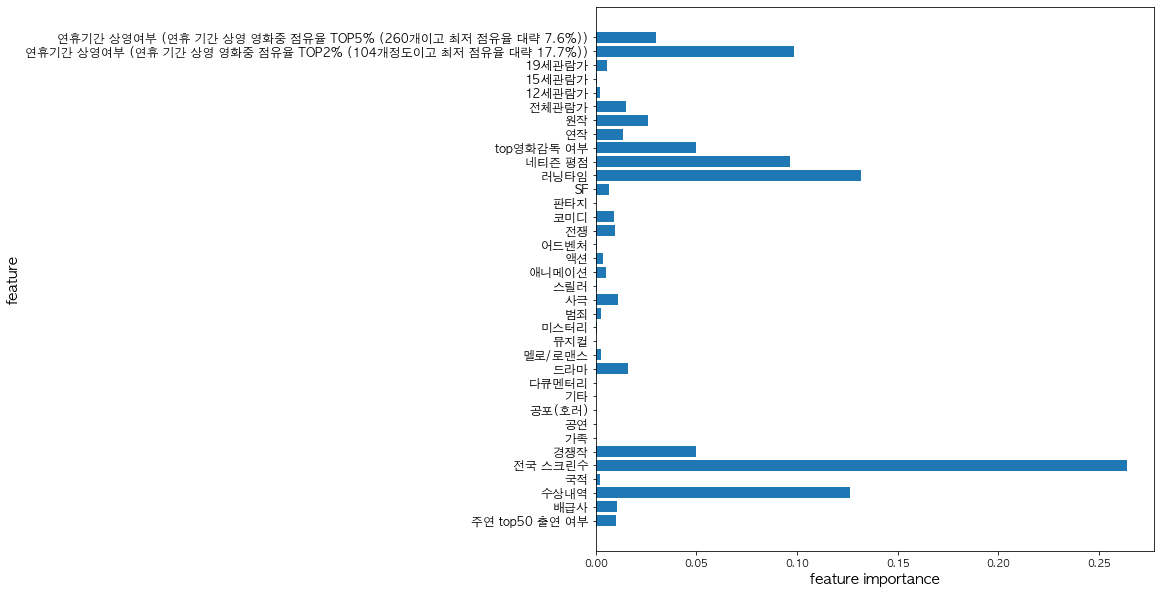

In [ ]:
feature_importance = model.feature_importances_
feature_name = list(x.columns)
n_feature = x_train.shape[1]
idx = np.arange(n_feature)
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(idx, feature_importance, align='center')
plt.yticks(idx, feature_name, size=12)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()

In [ ]:
sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print(times)

0:00:11
